#Introduction :
Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.



#Target:
We need to analyse the dataset which will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

#Dataset:

Dataset Link: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv

#Column Profiling:

  - Serial No. (Unique row ID)
  - GRE Scores (out of 340)
  - TOEFL Scores (out of 120)
  - University Rating (out of 5)
  - Statement of Purpose and Letter of Recommendation Strength (out of 5)
  - Undergraduate GPA (out of 10)
  - Research Experience (either 0 or 1)
  - Chance of Admit (ranging from 0 to 1)

#Exploratory Data Analysis

In [ ]:
#Import the data
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv

--2024-07-20 15:27:53--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 3.162.130.14, 3.162.130.189, 3.162.130.111, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|3.162.130.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16176 (16K) [text/plain]
Saving to: ‘Jamboree_Admission.csv’

Jamboree_Admission. 100%[===================>]  15.80K  --.-KB/s    in 0s      

2024-07-20 15:27:53 (177 MB/s) - ‘Jamboree_Admission.csv’ saved [16176/16176]



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as spy

In [ ]:
#Read the CSV file
jb_data = pd.read_csv("Jamboree_Admission.csv")

In [ ]:
jb_data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
#shape of data
print("No. of data points : ",jb_data.shape[0])
print("No of Columns : ",jb_data.shape[1])

No. of data points :  500
No of Columns :  9


In [ ]:
#check for NULL values
for col in jb_data.columns:
  print(col ," has ", jb_data[col].isna().sum(), " null values.")

Serial No.  has  0  null values.
GRE Score  has  0  null values.
TOEFL Score  has  0  null values.
University Rating  has  0  null values.
SOP  has  0  null values.
LOR   has  0  null values.
CGPA  has  0  null values.
Research  has  0  null values.
Chance of Admit   has  0  null values.


In [ ]:
jb_data.drop("Serial No.",axis=1,inplace=True)

In [ ]:
#Check the dataset info
jb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


**Insights**:
- All the data are numnerical.
-  There are 8 columns/features :
    - 7 feature
    - 1 target i.e., **Chance of Admit**
-   There are 500 data points.


In [ ]:
#Check for unique values for each column/feature
for col in jb_data.columns:
  print(col, " : ",jb_data[col].nunique())


GRE Score  :  49
TOEFL Score  :  29
University Rating  :  5
SOP  :  9
LOR   :  9
CGPA  :  184
Research  :  2
Chance of Admit   :  61


In [ ]:
#Statistical Infor about the Dataset
jb_data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Insights:


*  Standar Deviation of the columns are low thus indicating that the data is having lesser spread.



#Univariate Analysis

## Numrical Coloums

<ipython-input-13-6146571d8948>:3: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(hspace=2, wspace=5)


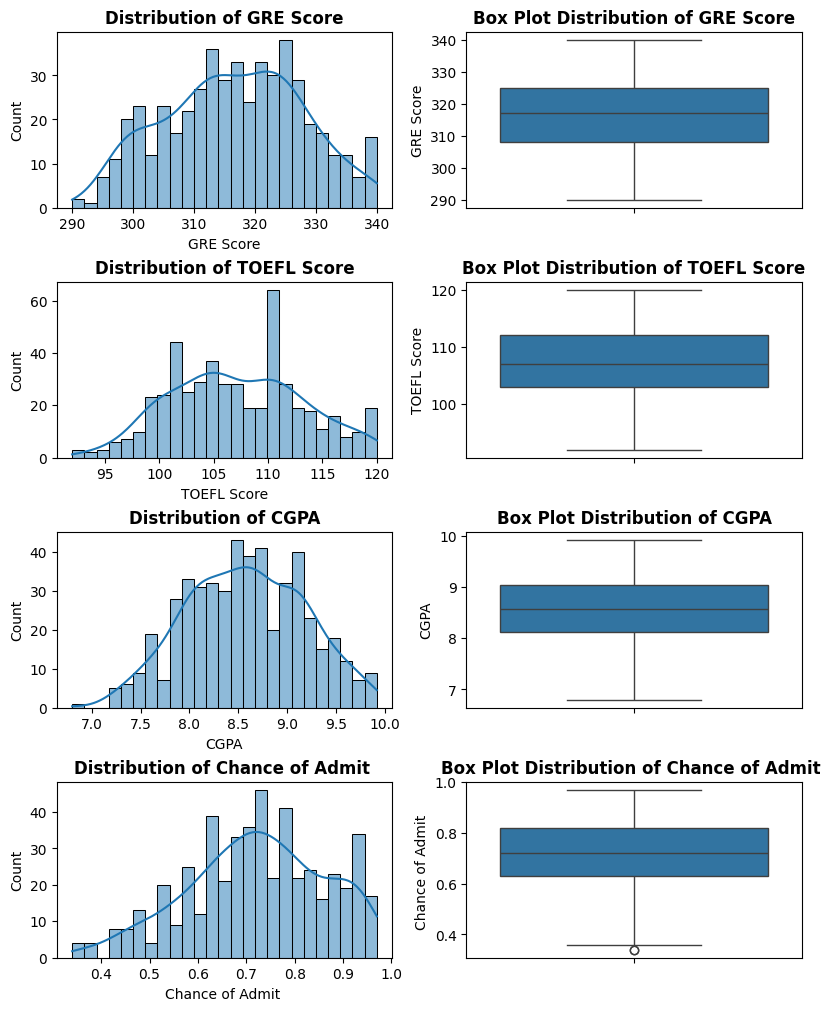

In [ ]:
num_cols = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']
fig, ax = plt.subplots(nrows=4, ncols=2,figsize=(8, 10), layout = 'constrained')
fig.subplots_adjust(hspace=2, wspace=5)
i=0
for col in num_cols:
  sns.histplot(data = jb_data[col], ax=ax[i,0], bins =25,kde="True")
  ax[i, 0].set_title(f"Distribution of {col}",{'weight':'bold'})

  sns.boxplot(data = jb_data, y =jb_data[col],ax = ax[i,1])
  ax[i, 1].set_title(f"Box Plot Distribution of {col}",{'weight':'bold'})

  i+=1

**Insights**:

- **GRE Score :**
    - GRE scores tends to follow Normal Distribution
    - No outliers are observed.
- **TOEFL Score :**
    - TOEFL scores tends to follow Normal Distribution
    - No outliers.
- **CGPA :**
    - CGPA tends to follow Normal Distribution
    - No outliers are present.
- **Chance of Admit**
    - It is slightly right skewed.
    - Only One outlier is present.

##Categoricals Column

<ipython-input-14-6fd43ca1d051>:3: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(hspace=2, wspace=5)


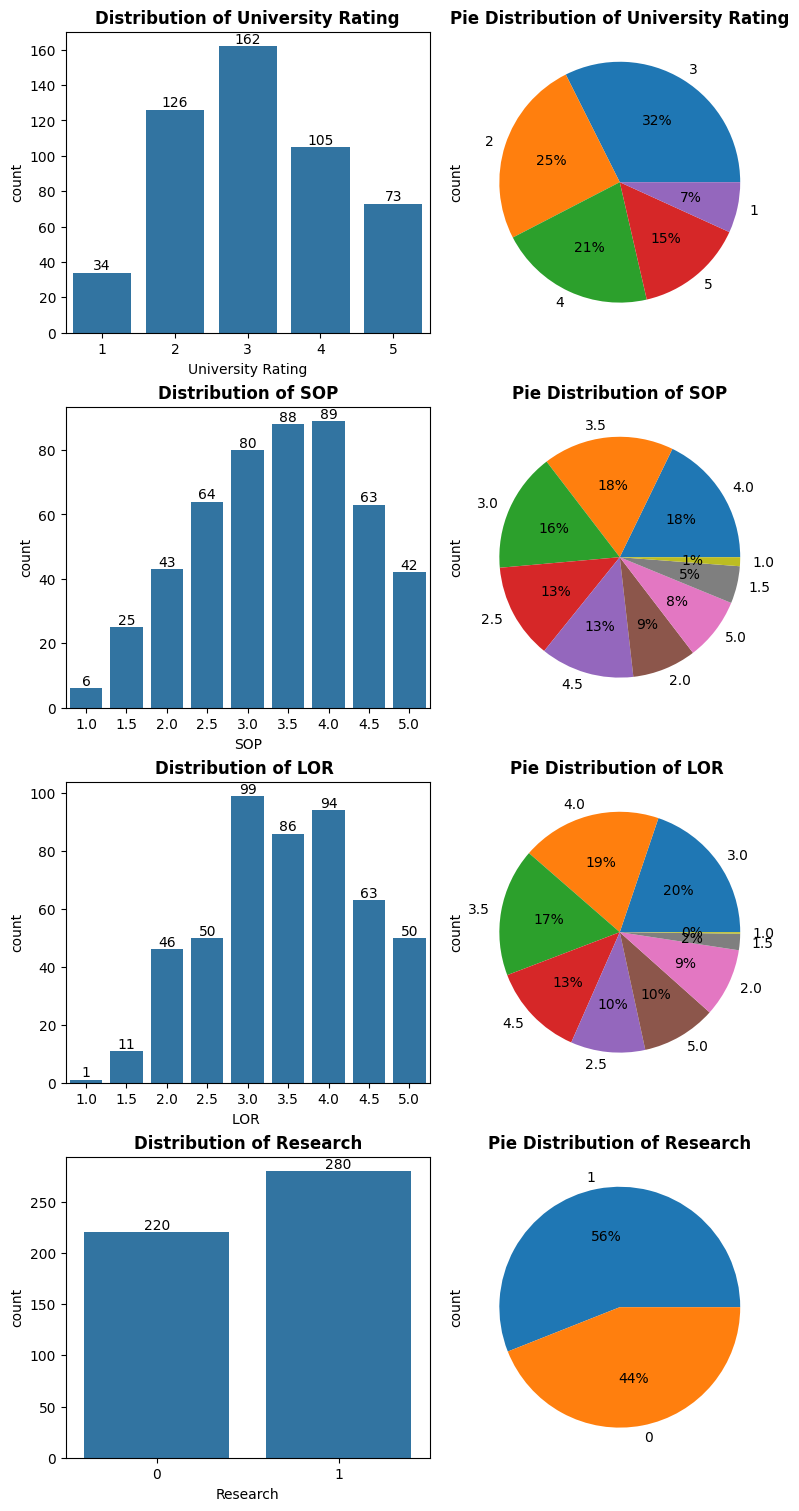

In [ ]:
cat_cols = ['University Rating', 'SOP', 'LOR ', 'Research']
fig, ax = plt.subplots(nrows=4, ncols=2,figsize=(8, 15), layout = 'constrained')
fig.subplots_adjust(hspace=2, wspace=5)
i=0
for col in cat_cols:
  d = sns.countplot(data = jb_data,x = jb_data[col], ax=ax[i,0])
  ax[i, 0].set_title(f"Distribution of {col}",{'weight':'bold'})
  for x in d.containers:
    d.bar_label(x)
  values = jb_data[col].value_counts()
  values.plot.pie(labels =jb_data[col].value_counts().index, autopct = "%.f%%",ax = ax[i,1])
  ax[i, 1].set_title(f"Pie Distribution of {col}",{'weight':'bold'})
  i+=1

**Insights**:

- **University Rating :**
    - Most student got rating 3.
- **SOP :**
    -  Students having LOR 3.5 and 4.0 covers the max perentage of coverage in the pie chart.
- **LOR :**
    - Many students have their LOR strength between 3.0 and 4.0.
- **Research**
    - Most of the students have Research experience.


#Bivariate Analysis

##Numerical Columns

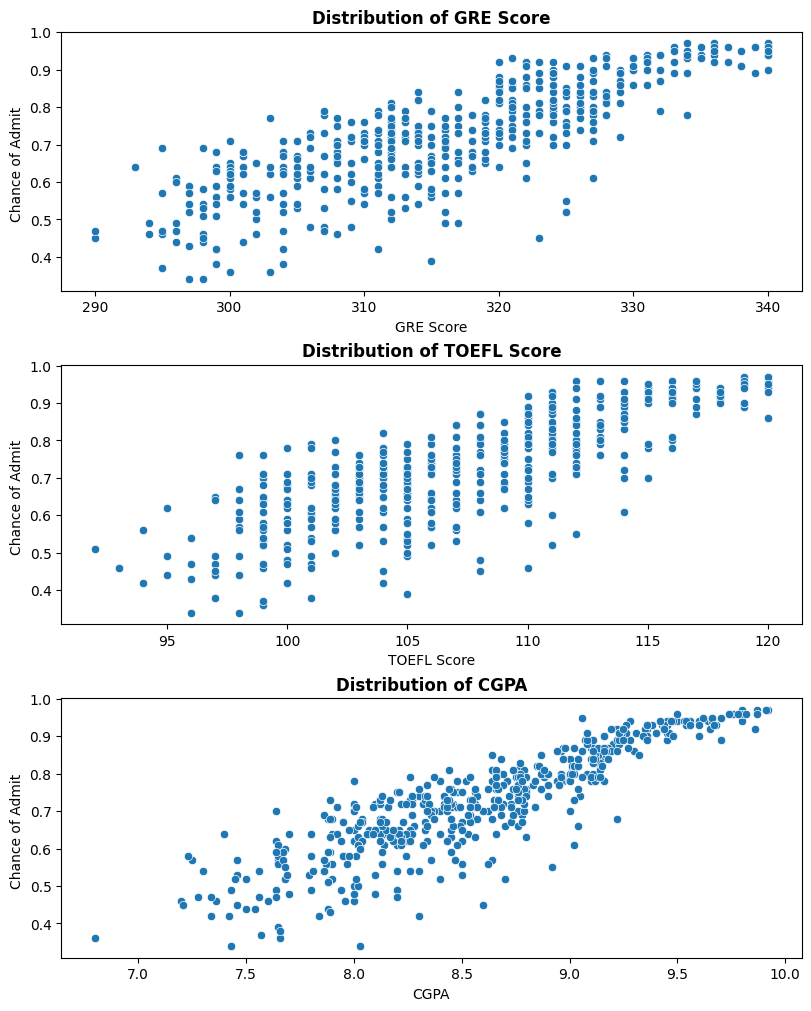

In [ ]:
num_cols = ['GRE Score', 'TOEFL Score', 'CGPA']
Output = 'Chance of Admit '
fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(8,10), layout = 'constrained')
#fig.subplots_adjust(hspace=2, wspace=5)
i=0
#sns.regplot(x='GRE Score', y ='Chance of Admit ',data = jb_data,ax=ax[0,0])
#ax.scatter('GRE Score', 'Chance of Admit ',data=jb_data,)
for col in num_cols:
  sns.scatterplot(x=col, y =Output,data = jb_data,ax = ax[i])
  ax[i].set_title(f"Distribution of {col}",{'weight':'bold'})
  i+=1
plt.show()

**Insights**:

- **Chance of Admit Analysis vs GRE :**
    - There is linear relationship between GRE and Chance of Admission
    - Higher the GRE indicates higher chance of admission
- **Chance of Admit Analysis vs TOEFL :**
    - There is linear relationship between TOEFL and Chance of Admission
    - Higher the TOEFL indicates higher chance of admission
- **Chance of Admit Analysis vs CGPA :**
    - There is linear relationship between CGPA and Chance of Admission
    - Higher the CGPA indicates higher chance of admission

#Multivariate Analysis

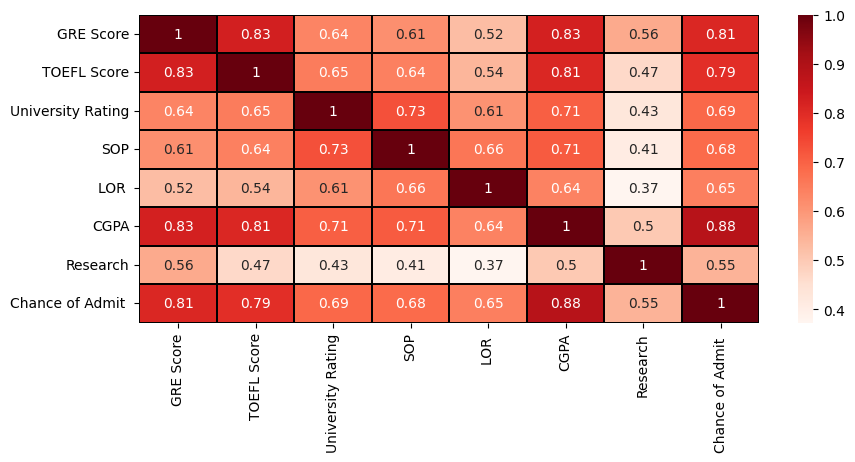

In [ ]:
corr_matrix = jb_data.corr()
plt.figure(figsize=(10,4))
sns.heatmap(corr_matrix,annot = True, cmap="Reds",linecolor = "black",linewidths=0.05)
plt.show()

Insights :

  - GRE Score and TOEFL Score have high positive correlation.
  - GRE Score and CGPA have high positive correlation. .
  - Chance of Admit have high positive correlation with GRE Score, TOEFL Score and CGPA.
  - Chance of Admit have moderate positive correlation with Research and LOR.
  - Research have low correlation with most of the columns.





#Data Preprocessing :

##Duplicate value check



In [ ]:
jb_data.duplicated().any()

False

## Missing value treatment

In [ ]:
for col in jb_data.columns:
  print(col ," has ", jb_data[col].isna().sum(), " null values.")

GRE Score  has  0  null values.
TOEFL Score  has  0  null values.
University Rating  has  0  null values.
SOP  has  0  null values.
LOR   has  0  null values.
CGPA  has  0  null values.
Research  has  0  null values.
Chance of Admit   has  0  null values.


## Outlier treatment

In [ ]:
for col in jb_data.columns:
    q1 = jb_data[col].quantile(0.25)
    q3 = jb_data[col].quantile(0.75)
    IQR = q3 - q1
    outliers = jb_data[col].loc[(jb_data[col]<(q1-1.5*IQR)) | (jb_data[col]>(q3+1.5*IQR))]
    print(f"Column {col} has : {outliers.count()} ouliers")

Column GRE Score has : 0 ouliers
Column TOEFL Score has : 0 ouliers
Column University Rating has : 0 ouliers
Column SOP has : 0 ouliers
Column LOR  has : 1 ouliers
Column CGPA has : 0 ouliers
Column Research has : 0 ouliers
Column Chance of Admit  has : 2 ouliers


##Data preparation for modeling

In [ ]:
temp = jb_data

In [ ]:
jb_data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
#Remove the target column
jb_data = temp
Output = jb_data['Chance of Admit ']
Input = jb_data.drop("Chance of Admit ",axis = 1)

In [ ]:
## Perform the train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Input,Output,test_size = 0.2, random_state = 50)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

In [ ]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-1.341245,-1.496266,-1.876743,-1.392079,-0.552460,-0.878353,0.895434
1,-0.269142,-0.829035,-0.114543,0.130706,0.560810,0.572781,0.895434
2,0.088225,-0.161804,-0.995643,-1.392079,0.004175,-0.728236,-1.116777
3,-0.447826,-0.328611,-0.114543,0.130706,-0.552460,-0.177806,0.895434
4,0.981644,1.005851,0.766557,0.130706,-0.552460,0.222507,0.895434
...,...,...,...,...,...,...,...
395,-0.269142,0.338620,-0.114543,0.638301,0.004175,0.739578,-1.116777
396,-1.073219,-0.662227,1.647657,1.653491,0.560810,0.139109,-1.116777
397,0.713618,0.505428,-0.114543,0.130706,0.004175,0.806297,0.895434
398,0.445593,-0.829035,-0.114543,0.130706,0.560810,0.756258,0.895434


In [ ]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-0.447826,-0.328611,-0.995643,-0.376889,-1.665731,-0.728236,0.895434
1,-0.090459,-0.328611,-0.995643,-1.392079,-1.109096,-1.512182,-1.116777
2,-0.894536,-0.662227,-0.114543,0.130706,-0.552460,-0.578119,-1.116777
3,-1.698612,-1.496266,-0.995643,-0.884484,-0.552460,-1.478823,-1.116777
4,-0.001117,-1.496266,-1.876743,-1.899674,-1.665731,-1.879135,-1.116777
...,...,...,...,...,...,...,...
95,-0.537168,-0.161804,0.766557,1.145896,1.117445,0.806297,0.895434
96,-0.179801,-0.161804,-0.995643,0.638301,0.004175,-0.511400,-1.116777
97,0.802960,0.839043,0.766557,0.130706,0.004175,0.606140,-1.116777
98,0.088225,0.005004,-0.995643,0.130706,-0.552460,-0.461361,-1.116777


In [ ]:
#Shape of the train and test data
print(f"Train data : rows = {X_train.shape[0]} and coloumns = {X_train.shape[1]}")
print(f"Test data : rows = {X_test.shape[0]} and coloumns = {X_test.shape[1]}")
n,d = X_test.shape

Train data : rows = 400 and coloumns = 7
Test data : rows = 100 and coloumns = 7


In [ ]:
n,d

(100, 7)

#Model Building


## LinearRegression Model

In [ ]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
model = LinearRegression() # model creation
model.fit(X_train, y_train) # model training
r2_score_train = model.score(X_train, y_train)
r2_score_test = model.score(X_test, y_test)
predict = model.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test,predict))
MAE = np.mean(np.absolute(y_test-predict))
Adj_R2 = 1 - ((1-r2_score_test)*(len(X_test)-1)/(len(X_test) - X_test.shape[1] -1))
model_coef = list(zip(X_train.columns, np.round(model.coef_,3)))


print("------------------ MODEL PERFORMANCE EVAUATION ------------------")
print("Linear Regression")
print("MAE Score : ",MAE)
print("RMSE Score : ",RMSE)
print("R2 Score : ",r2_score_test)
print("Adjusted R2 Score : ",Adj_R2)
print("Model Coefficients : ",model_coef)


print("Train R2 Score",r2_score_train)


------------------ MODEL PERFORMANCE EVAUATION ------------------
Linear Regression
MAE Score :  0.04040078799417792
RMSE Score :  0.05692916328483249
R2 Score :  0.8413731950456499
Adjusted R2 Score :  0.8293037642339058
Model Coefficients :  [('GRE Score', 0.02), ('TOEFL Score', 0.015), ('University Rating', 0.008), ('SOP', 0.0), ('LOR ', 0.015), ('CGPA', 0.075), ('Research', 0.011)]
Train R2 Score 0.8161934399033786


## Lasso Regression Model

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
model = Lasso() # model creation
model.fit(X_train, y_train) # model training
r2_score_train = model.score(X_train, y_train)
r2_score_test = model.score(X_test, y_test)
predict = model.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test,predict))
MAE = np.mean(np.absolute(y_test-predict))
Adj_R2 = 1 - ((1-r2_score_test)*(len(X_test)-1)/(len(X_test) - X_test.shape[1] -1))
model_coef = list(zip(X_train.columns, np.round(model.coef_,3)))
print("------------------ MODEL PERFORMANCE EVAUATION ------------------")
print("Lasso Regression")
print("MAE Score : ",MAE)
print("RMSE Score : ",RMSE)
print("R2 Score : ",r2_score_test)
print("Adjusted R2 Score : ",Adj_R2)
print("Model Coefficients : ",model_coef)


print("Train R2 Score",r2_score_train)

------------------ MODEL PERFORMANCE EVAUATION ------------------
Lasso Regression
MAE Score :  0.118835
RMSE Score :  0.14353437088377125
R2 Score :  -0.008367396907468905
Adjusted R2 Score :  -0.08509100319390672
Model Coefficients :  [('GRE Score', 0.0), ('TOEFL Score', 0.0), ('University Rating', 0.0), ('SOP', 0.0), ('LOR ', 0.0), ('CGPA', 0.0), ('Research', 0.0)]
Train R2 Score 0.0


##Ridge Regression Model

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
model = Ridge() # model creation
model.fit(X_train, y_train) # model training
r2_score_train = model.score(X_train, y_train)
r2_score_test = model.score(X_test, y_test)
predict = model.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test,predict))
MAE = np.mean(np.absolute(y_test-predict))
Adj_R2 = 1 - ((1-r2_score_test)*(len(X_test)-1)/(len(X_test) - X_test.shape[1] -1))
model_coef = list(zip(X_train.columns, np.round(model.coef_,3)))
print("------------------ MODEL PERFORMANCE EVAUATION ------------------")
print( "Ridge Regression")
print("MAE Score : ",MAE)
print("RMSE Score : ",RMSE)
print("R2 Score : ",r2_score_test)
print("Adjusted R2 Score : ",Adj_R2)
print("Model Coefficients : ",model_coef)

print("Train R2 Score",r2_score_train)

------------------ MODEL PERFORMANCE EVAUATION ------------------
Ridge Regression
MAE Score :  0.04034761502491392
RMSE Score :  0.05687874314311118
R2 Score :  0.8416540508938299
Adjusted R2 Score :  0.8296059895487953
Model Coefficients :  [('GRE Score', 0.021), ('TOEFL Score', 0.016), ('University Rating', 0.008), ('SOP', 0.0), ('LOR ', 0.015), ('CGPA', 0.074), ('Research', 0.011)]
Train R2 Score 0.8161880368496199


In [ ]:
import statsmodels.api as sm
X_sm = sm.add_constant(X_train)
model = sm.OLS(np.array(y_train),X_sm)
results = model.fit()
# statstical summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     248.7
Date:                Sat, 20 Jul 2024   Prob (F-statistic):          6.52e-140
Time:                        15:28:05   Log-Likelihood:                 556.53
No. Observations:                 400   AIC:                            -1097.
Df Residuals:                     392   BIC:                            -1065.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7191      0.00

**Insights :**


*   Lasso Regression cannot be used with this data set. It is giving very bad score.

* For Linear and Ridge Regression MAE and RMSE is approximately 0 indicating that the errors are minimized and thus the model seems to be good.
*  For Linear and Ridge Regression R2 score is close to 1 indicating that the model performane is good.


#Testing the assumptions of the linear regression model

## MultiColinearity Check

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_t = pd.DataFrame(X_train,columns=X_train.columns)
vif = pd.DataFrame()

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [ ]:
vif

,Features,VIF
5,CGPA,4.66
0,GRE Score,4.49
1,TOEFL Score,3.91
3,SOP,2.79
2,University Rating,2.45
4,LOR,1.92
6,Research,1.44


## Normality of residuals

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression() # model creation
model.fit(X_train, y_train) # model training
y_train_predict = model.predict(X_train)
residuals =  y_train - y_train_predict
print("Residuals : ",residuals)

Residuals :  369    0.079480
364    0.009170
355    0.085996
114   -0.102681
319    0.020850
         ...   
289    0.029188
109   -0.025805
395    0.009162
480    0.010894
176    0.018872
Name: Chance of Admit , Length: 400, dtype: float64


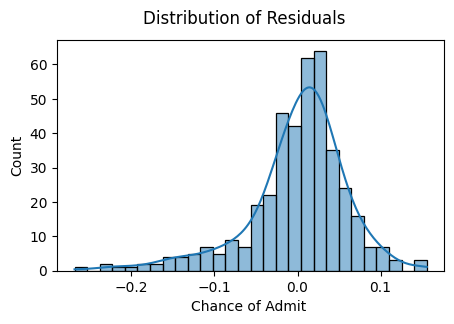

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(5,3))
sns.histplot(data = residuals,kde="True")
#sns.distplot(residuals)
fig.suptitle('Distribution of Residuals')
plt.show()

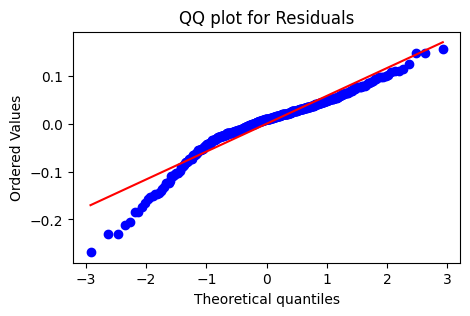

In [ ]:
plt.figure(figsize=(5,3))
spy.probplot(residuals, plot = plt, dist = 'norm')
plt.title('QQ plot for Residuals')
plt.show()

## Mean of residuals

In [ ]:
print("Mean of residuals : ",np.mean(residuals))

Mean of residuals :  1.3128387266192477e-16


##Test for Homoscedasticity

In [ ]:
# Null Hypothesis(H0) - Data is Homoskedastic
# Alternate Hypothesis(HA) - Data is Heteroskedastic

from statsmodels.stats.api import het_goldfeldquandt
test_stat, p_value, increasing = het_goldfeldquandt(residuals,X_train)
print("F statistics:", test_stat)
print('p-value', p_value)
print()
if p_value < 0.05:
    print('The data is Heteroskedastic')
else:

    print('The data is Homoskedastic ')

F statistics: 0.7481933112047707
p-value 0.9777283062798525

The data is Homoskedastic 


##Linearity of variables

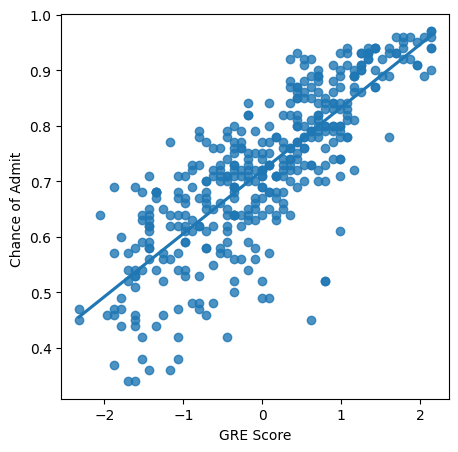

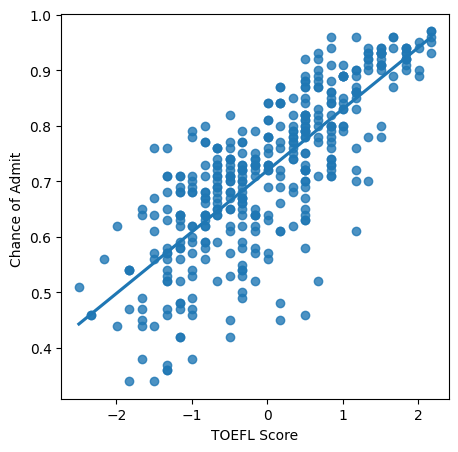

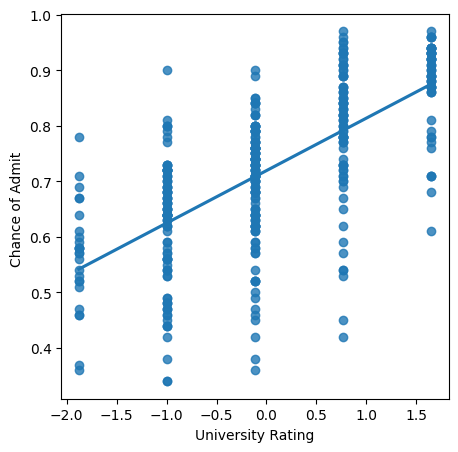

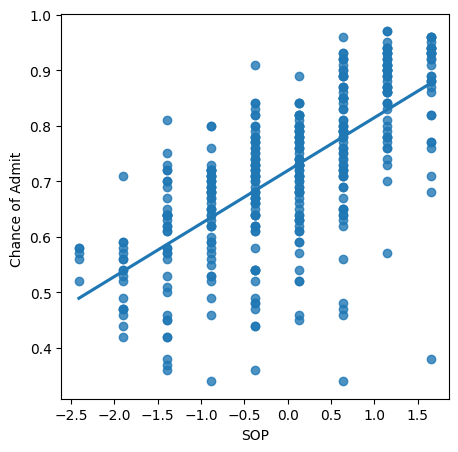

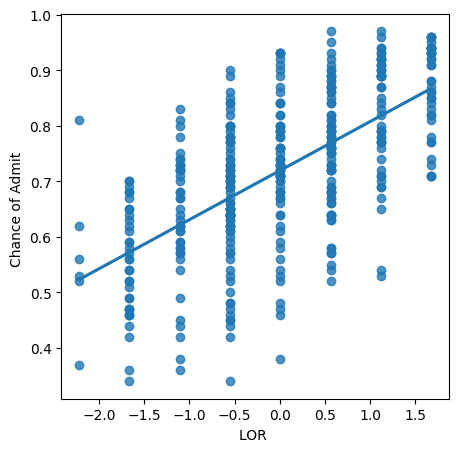

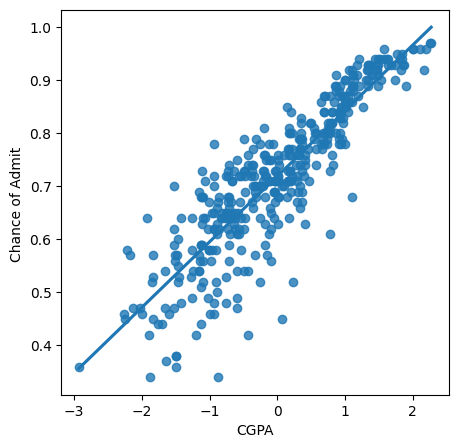

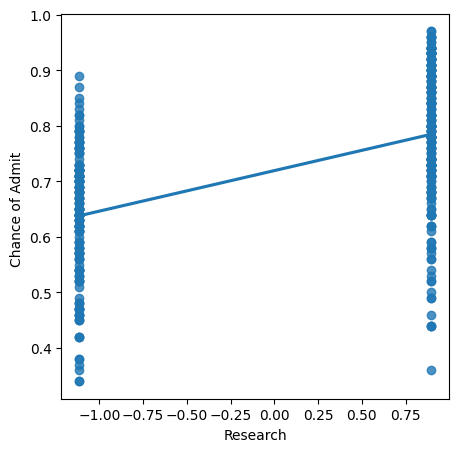

In [ ]:
cols = np.array(X_train.columns)
for c in cols:
  plt.figure(figsize = (5,5))
  sns.regplot(x=X_train[c],y = y_train,ci=None)
  plt.show()

Insights:
There is linearity between the input columns and the output.

# Recommendations
*  Lasso Regression cannot be used with this data set. It is giving very bad score.
*  "Chance of Admit" have high positive correlation with "GRE Score", "TOEFL Score" and "CGPA".
* It is better to have "Research" experience for the student.
* CGPA plays the most imprtant role of getting the chance in admission while SOP is the least.
* This models attains accuracy around around 84% and this can improve with furthr eusing feature engineering. We can also add other columns/features like "No of Projects Done","Industry Exposure","Extra CAricular Activities" etc which will help in determing more accurately of judging a candidate for the admission.
* For Linear and Ridge RegressionR2 score is close to 1 indicating that the model performane is good.
*  The score for both tarining and test data are almost equal which indicats that Both Linear and Ridge regression model are good,